In [1]:
import os
os.environ["CUDA_VISIBLE_DEVICES"] = ""
os.environ["LATEXIFY"] = ""
os.environ["FIG_DIR"] = "figures/"

from time import time
import jax.numpy as jnp
import jax.scipy as jsp
import jax.random as jr
from scipy.stats import norm
import numpy as np
import scipy

from sklearn.ensemble import RandomForestRegressor

# import tensorflow_probability.substrates.jax as tfp
# tfd = tfp.distributions
# tfb = tfp.bijectors

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from runner import load_data, train, test

from probml_utils import savefig, latexify

/home/anonymous/miniconda3/envs/jax_gpu/lib/python3.9/site-packages/pkg_resources/__init__.py:122: PkgResourcesDeprecationWarning: LOCAL is an invalid version and will not be supported in a future release
  warnings.warn(
/home/anonymous/miniconda3/envs/jax_gpu/lib/python3.9/site-packages/pkg_resources/__init__.py:122: PkgResourcesDeprecationWarning: pre-0.1 is an invalid version and will not be supported in a future release
  warnings.warn(


In [2]:
# %pip install jax_tqdm

In [3]:
def rmse_fn(y_true, y_pred):
    return np.sqrt(np.mean((y_true - y_pred) ** 2))

def msll_fn(y_true, y_pred, y_std):
    return -norm.logpdf(y_true, loc=y_pred, scale=y_std).mean()

## Results

In [4]:
def get_res(cls):
    rmse_list = []
    msll_list = []
    res_list = []
    tests = []
    preds = []
    stds = []
    for fold in range(3):
        root = f'./{cls.rootdir}/{cls.model_type}-{cls.gp}-{cls.latent_model}-grid-{cls.grid_size}-ind-{cls.n_inducing}-{cls.kernel}-time-{cls.time_kernel}/fold-{fold}/opt-{cls.optimizer}-epochs-{cls.epochs}-lr-{cls.lr}'
        res = pd.read_pickle(f'{root}/fet-{"_".join(sorted(eval(cls.features)))}.pkl')
        # print(res.keys())
        rmse = rmse_fn(res["y_test"], res["pred_mean"])
        msll = msll_fn(res["y_test"], res["pred_mean"], res["pred_std"])
        rmse_list.append(rmse)
        msll_list.append(msll)
        res_list.append(res)
        tests.append(res["y_test"])
        preds.append(res["pred_mean"])
        stds.append(res["pred_std"])

    # mean_rmse = rmse_fn(np.concatenate(tests), np.concatenate(preds))
    # mean_msll = msll_fn(np.concatenate(tests), np.concatenate(preds), np.concatenate(stds))
    rmse_list.append(f"{np.mean(rmse_list):.2f} $\pm$ {np.std(rmse_list):.2f}")
    msll_list.append(f"{np.mean(msll_list):.2f} $\pm$ {np.std(msll_list):.2f}")
    # rmse_list.append(mean_rmse)
    # msll_list.append(mean_msll)
    
    return {"rmse_list": rmse_list, "msll_list": msll_list, "res_list": res_list}


def cls_to_args(cls):
    args = type(
        "args",
        (),
        {
            "mode": cls.mode,
            "fold": int(cls.fold),
            "lr": float(cls.lr),
            "epochs": int(cls.epochs),
            "n_inducing": int(cls.n_inducing),
            "kernel": cls.kernel,
            "time_kernel": cls.time_kernel,
            "optimizer": cls.optimizer,
            "gp": cls.gp,
            "model_type": cls.model_type,
            "latent_model": cls.latent_model,
            "grid_size": int(cls.grid_size),
            "features": eval(cls.features),
            "seed": int(cls.seed),
            "root": f"./{cls.rootdir}/{cls.model_type}-{cls.gp}-{cls.latent_model}-grid-{cls.grid_size}-ind-{cls.n_inducing}-{cls.kernel}-time-{cls.time_kernel}/fold-{cls.fold}/opt-{cls.optimizer}-epochs-{cls.epochs}-lr-{cls.lr}",
        },
    )
    return args


class EGP:
    rootdir = "results"
    seed = 0
    mode = "test"                                 # ["train", "test"]
    gp = "exact"                                 # ["exact", "sparse"]
    model_type = "e"                              # ["e", "l", "ls", "lso"]
    latent_model = "heinonen"                      # ["heinonen", "delta", "gaussian", "plagemann"]
    grid_size = 100
    features = '["latitude","longitude","temperature","humidity","wind_speed","delta_t","weather","wind_direction"]'
    n_inducing = 3000
    epochs = 500
    kernel = "matern32"
    time_kernel = "matern32"
    lr = 0.1
    optimizer = "lbfgsb"                          # ["adam", "lbfgsb", "bfgs"]

class SGP4000:
    rootdir = "results"
    seed = 0
    mode = "test"                                 # ["train", "test"]
    gp = "sparse"                                 # ["exact", "sparse"]
    model_type = "e"                              # ["e", "l", "ls", "lso"]
    latent_model = "heinonen"                      # ["heinonen", "delta", "gaussian", "plagemann"]
    grid_size = 100
    features = '["latitude","longitude","temperature","humidity","wind_speed","delta_t","weather","wind_direction"]'
    n_inducing = 4000
    epochs = 500
    kernel = "matern32"
    time_kernel = "matern32"
    lr = 0.1
    optimizer = "lbfgsb"                          # ["adam", "lbfgsb", "bfgs"]

class SGP3000:
    rootdir = "results"
    seed = 0
    mode = "test"                                 # ["train", "test"]
    gp = "sparse"                                 # ["exact", "sparse"]
    model_type = "e"                              # ["e", "l", "ls", "lso"]
    latent_model = "heinonen"                      # ["heinonen", "delta", "gaussian", "plagemann"]
    grid_size = 100
    features = '["latitude","longitude","temperature","humidity","wind_speed","delta_t","weather","wind_direction"]'
    n_inducing = 3000
    epochs = 500
    kernel = "matern32"
    time_kernel = "matern32"
    lr = 0.1
    optimizer = "lbfgsb"                          # ["adam", "lbfgsb", "bfgs"]

class SGP2000:
    rootdir = "results"
    seed = 0
    mode = "test"                                 # ["train", "test"]
    gp = "sparse"                                 # ["exact", "sparse"]
    model_type = "e"                              # ["e", "l", "ls", "lso"]
    latent_model = "heinonen"                      # ["heinonen", "delta", "gaussian", "plagemann"]
    grid_size = 100
    features = '["latitude","longitude","temperature","humidity","wind_speed","delta_t","weather","wind_direction"]'
    n_inducing = 2000
    epochs = 500
    kernel = "matern32"
    time_kernel = "matern32"
    lr = 0.1
    optimizer = "lbfgsb"                          # ["adam", "lbfgsb", "bfgs"]

class SGP1000:
    rootdir = "results"
    seed = 0
    mode = "test"                                 # ["train", "test"]
    gp = "sparse"                                 # ["exact", "sparse"]
    model_type = "e"                              # ["e", "l", "ls", "lso"]
    latent_model = "heinonen"                      # ["heinonen", "delta", "gaussian", "plagemann"]
    grid_size = 100
    features = '["latitude","longitude","temperature","humidity","wind_speed","delta_t","weather","wind_direction"]'
    n_inducing = 1000
    epochs = 500
    kernel = "matern32"
    time_kernel = "matern32"
    lr = 0.1
    optimizer = "lbfgsb"                          # ["adam", "lbfgsb", "bfgs"]

class HEGP_P:
    rootdir = "results"
    seed = 0
    mode = "test"                                 # ["train", "test"]
    gp = "exact"                                 # ["exact", "sparse"]
    model_type = "o"                              # ["e", "l", "ls", "lso"]
    latent_model = "plagemann"                      # ["heinonen", "delta", "gaussian", "plagemann"]
    grid_size = 100
    features = '["latitude","longitude","temperature","humidity","wind_speed","delta_t","weather","wind_direction"]'
    n_inducing = 3000
    epochs = 500
    kernel = "matern32"
    time_kernel = "matern32"
    lr = 0.1
    optimizer = "lbfgsb"                          # ["adam", "lbfgsb", "bfgs"]

class HEGP_H:
    rootdir = "results"
    seed = 0
    mode = "test"                                 # ["train", "test"]
    gp = "exact"                                 # ["exact", "sparse"]
    model_type = "o"                              # ["e", "l", "ls", "lso"]
    latent_model = "heinonen"                      # ["heinonen", "delta", "gaussian", "plagemann"]
    grid_size = 100
    features = '["latitude","longitude","temperature","humidity","wind_speed","delta_t","weather","wind_direction"]'
    n_inducing = 3000
    epochs = 500
    kernel = "matern32"
    time_kernel = "matern32"
    lr = 0.1
    optimizer = "lbfgsb"                          # ["adam", "lbfgsb", "bfgs"]

class HEGP_D:
    rootdir = "results"
    seed = 0
    mode = "test"                                 # ["train", "test"]
    gp = "exact"                                 # ["exact", "sparse"]
    model_type = "o"                              # ["e", "l", "ls", "lso"]
    latent_model = "delta"                      # ["heinonen", "delta", "gaussian", "plagemann"]
    grid_size = 100
    features = '["latitude","longitude","temperature","humidity","wind_speed","delta_t","weather","wind_direction"]'
    n_inducing = 3000
    epochs = 500
    kernel = "matern32"
    time_kernel = "matern32"
    lr = 0.1
    optimizer = "lbfgsb"                          # ["adam", "lbfgsb", "bfgs"]

class HSGP4000:
    rootdir = "results"
    seed = 0
    mode = "test"                                 # ["train", "test"]
    gp = "sparse"                                 # ["exact", "sparse"]
    model_type = "o"                              # ["e", "l", "ls", "lso"]
    latent_model = "heinonen"                      # ["heinonen", "delta", "gaussian", "plagemann"]
    grid_size = 100
    features = '["latitude","longitude","temperature","humidity","wind_speed","delta_t","weather","wind_direction"]'
    n_inducing = 4000
    epochs = 500
    kernel = "matern32"
    time_kernel = "matern32"
    lr = 0.1
    optimizer = "lbfgsb"                          # ["adam", "lbfgsb", "bfgs"]

class HSGP3000:
    rootdir = "results"
    seed = 0
    mode = "test"                                 # ["train", "test"]
    gp = "sparse"                                 # ["exact", "sparse"]
    model_type = "o"                              # ["e", "l", "ls", "lso"]
    latent_model = "heinonen"                      # ["heinonen", "delta", "gaussian", "plagemann"]
    grid_size = 100
    features = '["latitude","longitude","temperature","humidity","wind_speed","delta_t","weather","wind_direction"]'
    n_inducing = 3000
    epochs = 500
    kernel = "matern32"
    time_kernel = "matern32"
    lr = 0.1
    optimizer = "lbfgsb"                          # ["adam", "lbfgsb", "bfgs"]

class HSGP2000:
    rootdir = "results"
    seed = 0
    mode = "test"                                 # ["train", "test"]
    gp = "sparse"                                 # ["exact", "sparse"]
    model_type = "o"                              # ["e", "l", "ls", "lso"]
    latent_model = "heinonen"                      # ["heinonen", "delta", "gaussian", "plagemann"]
    grid_size = 100
    features = '["latitude","longitude","temperature","humidity","wind_speed","delta_t","weather","wind_direction"]'
    n_inducing = 2000
    epochs = 500
    kernel = "matern32"
    time_kernel = "matern32"
    lr = 0.1
    optimizer = "lbfgsb"                          # ["adam", "lbfgsb", "bfgs"]

class HSGP1000:
    rootdir = "results"
    seed = 0
    mode = "test"                                 # ["train", "test"]
    gp = "sparse"                                 # ["exact", "sparse"]
    model_type = "o"                              # ["e", "l", "ls", "lso"]
    latent_model = "heinonen"                      # ["heinonen", "delta", "gaussian", "plagemann"]
    grid_size = 100
    features = '["latitude","longitude","temperature","humidity","wind_speed","delta_t","weather","wind_direction"]'
    n_inducing = 1000
    epochs = 500
    kernel = "matern32"
    time_kernel = "matern32"
    lr = 0.1
    optimizer = "lbfgsb"                          # ["adam", "lbfgsb", "bfgs"]

class LSGP3000:
    rootdir = "results"
    seed = 0
    mode = "test"                                 # ["train", "test"]
    gp = "sparse"                                 # ["exact", "sparse"]
    model_type = "l"                              # ["e", "l", "ls", "lso"]
    latent_model = "heinonen"                     # ["heinonen", "delta", "gaussian", "plagemann"]
    grid_size = 100
    features = '["latitude","longitude","temperature","humidity","wind_speed","delta_t","weather","wind_direction"]'
    n_inducing = 3000
    epochs = 500
    kernel = "matern32"
    time_kernel = "matern32"
    lr = 0.1
    optimizer = "lbfgsb"                          # ["adam", "lbfgsb", "bfgs"]

class SSGP3000:
    rootdir = "results"
    seed = 0
    mode = "test"                                 # ["train", "test"]
    gp = "sparse"                                 # ["exact", "sparse"]
    model_type = "s"                              # ["e", "l", "ls", "lso"]
    latent_model = "heinonen"                     # ["heinonen", "delta", "gaussian", "plagemann"]
    grid_size = 100
    features = '["latitude","longitude","temperature","humidity","wind_speed","delta_t","weather","wind_direction"]'
    n_inducing = 3000
    epochs = 500
    kernel = "matern32"
    time_kernel = "matern32"
    lr = 0.1
    optimizer = "lbfgsb"                          # ["adam", "lbfgsb", "bfgs"]

In [5]:
# egp = get_res(EGP)
# hsgp3000 = get_res(HEGP_P)
# lsgp3000 = get_res(LSGP3000)
# ssgp3000 = get_res(SSGP3000)

rmse_df = pd.DataFrame(columns=["fold1", "fold2", "fold3", "mean"])
msll_df = pd.DataFrame(columns=["fold1", "fold2", "fold3", "mean"])
methods = [EGP, HEGP_P, HEGP_D, HEGP_H, SGP4000, SGP3000, SGP2000, SGP1000, HSGP4000, HSGP3000, HSGP2000, HSGP1000]
for each in methods:
    # print(get_res(each))
    rmse_df.loc[each.__name__.replace("_", "-")] = get_res(each)["rmse_list"]
    msll_df.loc[each.__name__.replace("_", "-")] = list(map(str, get_res(each)["msll_list"]))

# display upto 2 decimal places for MSLL
pd.options.display.float_format = '{:,.2f}'.format
display(rmse_df)
pd.options.display.float_format = '{:,.2f}'.format
# display(msll_df)
# highlight the best msll and show upto 2 decimal places
msll_df.style.highlight_min(axis=0, color='green')

2023-03-02 15:29:33.066682: E external/org_tensorflow/tensorflow/compiler/xla/stream_executor/cuda/cuda_driver.cc:267] failed call to cuInit: CUDA_ERROR_NO_DEVICE: no CUDA-capable device is detected


,fold1,fold2,fold3,mean
EGP,26.53,29.75,24.84,27.04 $\pm$ 2.03
HEGP-P,23.05,25.92,25.32,24.77 $\pm$ 1.24
HEGP-D,23.11,26.23,25.34,24.89 $\pm$ 1.31
HEGP-H,23.08,25.71,25.10,24.63 $\pm$ 1.12
SGP4000,22.79,23.44,24.12,23.45 $\pm$ 0.54
SGP3000,22.73,23.49,24.19,23.47 $\pm$ 0.59
SGP2000,23.62,24.21,24.30,24.04 $\pm$ 0.30
SGP1000,24.63,25.25,25.57,25.15 $\pm$ 0.39
HSGP4000,22.84,24.21,24.29,23.78 $\pm$ 0.67
HSGP3000,23.12,24.55,24.83,24.16 $\pm$ 0.75


,fold1,fold2,fold3,mean
EGP,4.853136532157213,4.752625358735961,4.792885571275202,4.80 $\pm$ 0.04
HEGP-P,4.596890428294789,4.965548009329262,5.080898833276088,4.88 $\pm$ 0.21
HEGP-D,4.592040121654958,4.846105841942959,5.223643107913153,4.89 $\pm$ 0.26
HEGP-H,4.57783907060593,4.7500810941391505,5.060029646799052,4.80 $\pm$ 0.20
SGP4000,4.5296763950839205,4.5626737386134515,4.58194834110121,4.56 $\pm$ 0.02
SGP3000,4.528345645783838,4.565111805023903,4.5842465329487005,4.56 $\pm$ 0.02
SGP2000,4.575218270532658,4.601501486434581,4.591971726122089,4.59 $\pm$ 0.01
SGP1000,4.626765722720077,4.659598203568725,4.652907076639273,4.65 $\pm$ 0.01
HSGP4000,4.506229932281201,4.666001570935273,4.51167304414526,4.56 $\pm$ 0.07
HSGP3000,4.542367005716741,4.689296992707874,4.525919903524515,4.59 $\pm$ 0.07


## Distribution of data

saving image to figures/violin_beijing_latexified.pdf
Figure size: [3.  1.5]


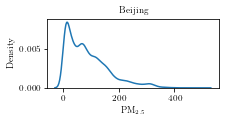

In [22]:
data = jnp.concatenate([get_res(each)['res_list'][i]["y_test"] for i in range(3)])

latexify(fig_width=3, fig_height=1.5)

plt.figure()
# sns.violinplot(data)
sns.kdeplot(data)
plt.xlabel("PM$_{2.5}$")
plt.ylabel("Density")
plt.title("Beijing")
# plt.legend();
savefig("violin_beijing")

In [54]:
latexify(fig_width=3, fig_height=1.5, font_size=7)
plt.figure()

methods = [EGP, HEGP_D, SGP4000, HSGP4000]
# methods = [EGP, HEGP_H, HEGP_P, HEGP_D, HSGP3000, HSGP2000, HSGP1000]
for M in methods:
    # s_id = 4
    # t = 10

    # get quantile by passing the percentage for Gaussian
    def get_multiplier(quantile):    
        return scipy.stats.norm.ppf(0.5 + 0.5 * (quantile / 100))

    def get_fraction(quantile):
        #[s_id::10]
        pred_mean = np.concatenate([get_res(M)['res_list'][tmp_fold]["pred_mean"] for tmp_fold in range(3)])
        pred_std = np.concatenate([get_res(M)['res_list'][tmp_fold]["pred_std"] for tmp_fold in range(3)])
        y_test = np.concatenate([get_res(M)['res_list'][tmp_fold]["y_test"] for tmp_fold in range(3)])

        alpha = get_multiplier(quantile)
        lower = pred_mean - alpha * pred_std
        upper = pred_mean + alpha * pred_std
        fraction = np.mean((lower <= y_test) & (y_test <= upper))
        return fraction

    quantiles = range(10, 101, 5)
    fractions = [get_fraction(quantile) for quantile in quantiles]

    if M.__name__ == "HSGP4000":
        linestyle = "--"
    else:
        linestyle = "-"
        
    plt.plot(quantiles, fractions, label=M.__name__.replace("_", "-"), linewidth=1, linestyle=linestyle);

ideal_fractions = np.linspace(0, 1, len(quantiles))
plt.plot(quantiles, ideal_fractions, label="Ideal", linestyle="--", color="black")

plt.xlabel("Quantile")
plt.ylabel("Fraction of data points")
plt.legend(loc='lower right');
# plt.tight_layout()

savefig("fractions_beijing")

saving image to figures/fractions_beijing_latexified.pdf
Figure size: [3.  1.5]


In [7]:
latexify(fig_width=3, fig_height=1.5, font_size=7)
plt.figure()

methods = [EGP, HEGP_H, SGP4000, HSGP4000]
# methods = [EGP, HEGP_H, HEGP_P, HEGP_D, HSGP3000, HSGP2000, HSGP1000]

# plt.figure(figsize=(12, 5))
i = 0
for M in methods:
    rmse_list = []
    msll_list = []
    for tmp_fold in range(3):
        pred_mean = get_res(M)['res_list'][tmp_fold]["pred_mean"]
        pred_std = get_res(M)['res_list'][tmp_fold]["pred_std"]
        y_test = get_res(M)['res_list'][tmp_fold]["y_test"]
        for s_id in range(10):
            rmse_s = rmse_fn(pred_mean[s_id::30], y_test[s_id::30])
            msll_s = msll_fn(y_test[s_id::30], pred_mean[s_id::30], pred_std[s_id::30])
            rmse_list.append(rmse_s)
            msll_list.append(msll_s)
    plt.bar(i*0.2+np.arange(30), rmse_list, label=M.__name__.replace("_", "-"), width=0.2)
    i += 1

plt.xticks(np.arange(0, 30, 2), np.arange(1, 31, 2))
plt.title("RMSE")
plt.legend(frameon=False)
plt.ylim(0, 80)
plt.xlabel("Station Number")
plt.ylabel("RMSE")

# plt.savefig("figures/rmse_beijing_per_station.pdf")
savefig("rmse_beijing_per_station")

saving image to figures/rmse_beijing_per_station_latexified.pdf
Figure size: [3.  1.5]


### Why hetero is better?

In [32]:
tmp_fold = 1
s_id = 5

M = EGP
X_test = get_res(M)['res_list'][tmp_fold]["X_test"][s_id::10]
pred_mean = get_res(M)['res_list'][tmp_fold]["pred_mean"][s_id::10]
pred_std = get_res(M)['res_list'][tmp_fold]["pred_std"][s_id::10]
y_test = get_res(M)['res_list'][tmp_fold]["y_test"][s_id::10]

latexify(fig_width=3, fig_height=3, font_size=7)

fig, ax = plt.subplots(3, 1, sharex=True, sharey=True)
# plt.scatter(X_test[:, 5], y_test, label="True", s=0.5)
ax[0].scatter(X_test[:, 5], y_test, s=0.5, color='k')
ax[0].plot(X_test[:, 5], pred_mean, label=M.__name__, color='b', linewidth=1)
ax[0].fill_between(X_test[:, 5], pred_mean - 2 * pred_std, pred_mean + 2 * pred_std, alpha=0.2, color='b')
ax[0].legend()

M = HEGP_H
X_test = get_res(M)['res_list'][tmp_fold]["X_test"][s_id::10]
pred_mean = get_res(M)['res_list'][tmp_fold]["pred_mean"][s_id::10]
pred_std = get_res(M)['res_list'][tmp_fold]["pred_std"][s_id::10]
y_test = get_res(M)['res_list'][tmp_fold]["y_test"][s_id::10]

# plt.scatter(X_test[:, 5], y_test, label="True", s=0.5)
ax[1].scatter(X_test[:, 5], y_test, s=0.5, color='k')
ax[1].plot(X_test[:, 5], pred_mean, label=M.__name__.split("_")[0], color='g', linewidth=1)
ax[1].fill_between(X_test[:, 5], pred_mean - 2 * pred_std, pred_mean + 2 * pred_std, alpha=0.2, color='g')
ax[1].legend()

M = HSGP4000
X_test = get_res(M)['res_list'][tmp_fold]["X_test"][s_id::10]
pred_mean = get_res(M)['res_list'][tmp_fold]["pred_mean"][s_id::10]
pred_std = get_res(M)['res_list'][tmp_fold]["pred_std"][s_id::10]
y_test = get_res(M)['res_list'][tmp_fold]["y_test"][s_id::10]

ax[2].scatter(X_test[:, 5], y_test, s=0.5, color='k')
ax[2].plot(X_test[:, 5], pred_mean, label=M.__name__, color='r', linewidth=1)
ax[2].fill_between(X_test[:, 5], pred_mean - 2 * pred_std, pred_mean + 2 * pred_std, alpha=0.2, color='r')
ax[2].legend()

ax[2].set_xlabel("Time")
fig.text(0, 0.5, "PM$_{2.5}$", va='center', rotation='vertical')
# plt.ylim(-100, 500)
# plt.legend(frameon=False, loc='upper right')

savefig("time_series_beijing_best")

saving image to figures/time_series_beijing_best_latexified.pdf
Figure size: [3. 3.]


In [8]:
def plot_posterior(cls, ax, fold, station):
    res = get_res(cls)
    res = res["res_list"][fold]

    best_restart = np.argmax([res[i]["loss_history"][-1] for i in range(4)])
    best_params = res[best_restart]["raw_params"]

    cls.fold = fold
    args = cls_to_args(cls)

    X_train, y_train, X_test, y_test, scaler = load_data(args, debug=False)
    model = build_model(args, X_train)
    print(model.X_inducing().shape, best_params["X_inducing"].shape)
    model.set_parameters(best_params)

    ax.scatter(res["X_test"][:, 5][station::10], res["y_test"][station::10], label="test", color="black", s=1)
    ax.plot(res["X_test"][:, 5][station::10], res["pred_mean"][station::10], label="pred", color="red", linewidth=0.5)
    ax.fill_between(res["X_test"][:, 5][station::10], res["pred_mean"][station::10] - 2 * res["pred_std"][station::10], res["pred_mean"][station::10] + 2 * res["pred_std"][station::10], color="red", alpha=0.2)
    return res


fig, ax = plt.subplots(1, 2, figsize=(20, 6))

plot_posterior(HSGP3000, ax[0], 0, 0);
# tmp = plot_posterior(hsgp3000, ax[1], 0, 0)

NameError: name 'build_model' is not defined

In [101]:
args = type(
        "args",
        (),
        {
            "mode": mode,
            "fold": int(0),
            "lr": float(lr),
            "epochs": int(epochs),
            "n_inducing": int(n_inducing),
            "kernel": kernel,
            "time_kernel": time_kernel,
            "optimizer": optimizer,
            "gp": gp,
            "model_type": model_type,
            "latent_model": latent_model,
            "grid_size": int(grid_size),
            "features": eval(features),
            "seed": int(seed),
            "root": f"./{rootdir}/{model_type}-{gp}-{latent_model}-grid-{grid_size}-ind-{n_inducing}-{kernel}-time-{time_kernel}/fold-{fold}/opt-{optimizer}-epochs-{epochs}-lr-{lr}",
        },
    )

In [102]:
res.keys()

dict_keys([0, 1, 2, 3, 'X_train', 'y_train', 'X_test', 'y_test', 'pred_mean', 'pred_std', 'pred_mean_train', 'pred_std_train'])

In [9]:
from runner import build_model, load_data
i = 1
X_train, y_train, X_test, y_test, scaler = load_data(args, debug=False)
model = build_model(args, X_train, debug=False)
model.set_raw_parameters(res2[i]["raw_params"])
# print(model.kernel.base_kernel.k2.k1.ell_model.theta.prior.sample((), jr.PRNGKey(4)))
# model.kernel.base_kernel.k2.k1.ell_model.theta.prior = tfd.Uniform(low=0.0, high=1/100)
# model.initialize(jr.PRNGKey(2))
model.eval()

# plt.eventplot(model.kernel.base_kernel.k2.k1.ell_model(res[i]['raw_params']["X_inducing"])(X_test)[:10, 1])
# print(model.kernel.base_kernel)
pred_sigma = model.likelihood.latent_model(model.X_inducing()[:, [0, 1, 5]])(X_test[:, [0, 1, 5]])
# pred_sigma = model.kernel.latent_model(model.X_inducing()[:, [0, 1, 5]])(X_test[:, [0, 1, 5]])

j = 8
plt.figure(figsize=(15, 5))
plt.plot(res2["y_test"][j::10])
plt.plot(res2["pred_mean"][j::10], color="green", linestyle="--", label='hetero mean')
plt.plot(res["pred_mean"][j::10], color="k", linestyle="--", label='exact mean')
plt.fill_between(np.arange(len(res2["y_test"][j::10])), res2["pred_mean"][j::10]-2*res2["pred_std"][j::10], res2["pred_mean"][j::10]+2*res2["pred_std"][j::10], alpha=0.5, label='hetero')
# plt.plot(res2["pred_mean"][j::10], color="red")
plt.fill_between(np.arange(len(res["y_test"][j::10])), res["pred_mean"][j::10]-2*res["pred_std"][j::10], res["pred_mean"][j::10]+2*res["pred_std"][j::10], alpha=0.5, color='red', label='exact')
# plt.plot(res["pred_mean"][j::10]-res["y_test"][j::10], color="red", label='sparse')
# plt.plot(res2["pred_mean"][j::10]-res["y_test"][j::10], color="green", label='exact')
plt.legend();
plt.ylabel("PM2.5");
plt.xlabel("Time (a random test station)");

plt.twinx().plot(pred_sigma[j::10]*scaler.y_scale, color="red", label='learned noise');
plt.legend(loc='upper left');
plt.ylabel("Sqrt of Noise variance")

NameError: name 'args' is not defined

In [ ]:
res[3]['raw_params']['kernel']['base_kernel']['k2']['k1']['ell_model']['theta']

Array([[-3.8402047, -3.5235717],
       [-4.4115314, -2.8850806],
       [-6.357419 , -6.212198 ],
       [-4.762901 , -4.92288  ],
       [-4.5415072, -4.7963605],
       [-5.1870832, -2.7861135],
       [-5.5703826, -5.210656 ],
       [-5.275604 , -4.9348984],
       [-4.584866 , -5.8300886],
       [-5.5699754, -7.7391534],
       [-5.2232876, -5.3103247],
       [-7.9488587, -4.6336265],
       [-4.9958634, -8.730081 ],
       [-5.371566 , -2.099554 ],
       [-4.58325  , -6.7908382],
       [-4.8801794, -5.1238785],
       [-5.137522 , -4.810518 ],
       [-5.1546884, -3.7038124],
       [-4.2910995, -2.855027 ],
       [-4.492814 , -4.8999996],
       [-6.7496586, -3.5378947],
       [-5.662767 , -2.9489048],
       [-4.771954 , -5.678096 ],
       [-4.213334 , -5.1941185],
       [-5.165005 , -5.537632 ],
       [-4.786041 , -5.577938 ],
       [-5.8370104, -5.4426274],
       [-5.8998165, -4.224969 ],
       [-3.5279012, -2.3702245],
       [-6.78247  , -6.804893 ],
       [-7

fold 0 24.3720944358585 -0.018198282406510852
fold 1 27.124139520742045 -0.01441485767390931
fold 2 26.469214324751356 -0.01764135509788346

fold 0 25.290857962900137 -0.014541387357443885
fold 1 30.2716806813958 -0.011057755525624898
fold 2 26.31727553548834 -0.016445889030463515

## Appendix

In [12]:
rootdir = "results"
seed = 0
fold = 0
gp = "sparse"                                 # ["exact", "sparse"]
model_type = "o"                              # ["e", "l", "ls", "lso"]
latent_model = "heinonen"                     # ["heinonen", "delta", "gaussian", "plagemann"]
grid_size = 100
features = '["latitude","longitude","temperature","humidity","wind_speed","delta_t","weather","wind_direction"]'
n_inducing = 3000
epochs = 500
kernel = "matern32"
time_kernel = "matern32"
lr = 0.1
optimizer = "lbfgsb"                          # ["adam", "lbfgsb", "bfgs"]
mode = "test"

args = type(
        "args",
        (),
        {
            "mode": mode,
            "fold": int(fold),
            "lr": float(lr),
            "epochs": int(epochs),
            "n_inducing": int(n_inducing),
            "kernel": kernel,
            "time_kernel": time_kernel,
            "optimizer": optimizer,
            "gp": gp,
            "model_type": model_type,
            "latent_model": latent_model,
            "grid_size": int(grid_size),
            "features": eval(features),
            "seed": int(seed),
            "root": f"./{rootdir}/{model_type}-{gp}-{latent_model}-grid-{grid_size}-ind-{n_inducing}-{kernel}-time-{time_kernel}/fold-{fold}/opt-{optimizer}-epochs-{epochs}-lr-{lr}",
        },
    )

In [16]:
X_train, y_train, X_test, y_test, scaler = load_data(args)
model = build_model(args, X_train)

# low, high = 0.0, 0.1
# model.kernel.variance.prior = tfd.Uniform(low=0.0, high=0.1)
# model.kernel.base_kernel.k2.lengthscale.prior = tfd.Uniform(low=low, high=high)
# model.kernel.base_kernel.k1.k1.k1.lengthscale.prior = tfd.Uniform(low=low, high=high)
# model.kernel.base_kernel.k1.k1.k2.lengthscale.prior = tfd.Uniform(low=low, high=high)
# model.kernel.base_kernel.k1.k2.k1.lengthscale.prior = tfd.Uniform(low=low, high=high)
# model.kernel.base_kernel.k1.k2.k2.lengthscale.prior = tfd.Uniform(low=low, high=high)

# for seed in trange(3):
#     key = jr.PRNGKey(seed)
#     res = model.fit(key, X_train, y_train, epochs=epochs, lr=lr, optimizer_name=optimizer)
#     pred_mean, pred_var = model.predict(X_train, y_train, X_test)
#     (_, _), (y_test_, pred_mean_) = scaler.inverse_transform((X_train, X_test), (y_test, pred_mean))
#     pred_std_ = np.sqrt(pred_var) * scaler.y_scale
#     print(seed, "RMSE", rmse_fn(y_test_, pred_mean_))
#     print(seed, "MSLL", msll_fn(y_test_, pred_mean_, pred_std_))
#     plt.plot(res["loss_history"], label='customized')

def find_gibbs(kernel):
    if isinstance(kernel, gpk.Gibbs):
        return kernel
    elif isinstance(kernel, (gpk.Product, gpk.Sum)):
        res = find_gibbs(kernel.k1)
        if res is not None:
            return res
        else:
            return find_gibbs(kernel.k2)
    else:
        return None


def customize_fn(model):
    if "o" in args.model_type:
        model.likelihood.latent_model.reverse_init(jnp.array(0.05))
    if "s" in args.model_type:
        model.likelihood.latent_model.forward_init(jnp.array(0.3))
    if "l" in args.model_type:
        find_gibbs(model.kernel.base_kernel).latent_model.reverse_init(jnp.array(0.05))

model = build_model(args, X_train)
rmse_list = []
msll_list = []
for seed in trange(3):
    init = time()
    key = jr.PRNGKey(seed)
    res = model.fit(key, X_train, y_train, epochs=epochs, lr=lr, optimizer_name=optimizer, customize_fn=customize_fn)
    model.set_raw_parameters(res["raw_params"])
    pred_mean, pred_var = model.predict(X_train, y_train, X_test)
    (_, _), (y_test_, pred_mean_) = scaler.inverse_transform((X_train, X_test), (y_test, pred_mean))
    pred_std_ = np.sqrt(pred_var) * scaler.y_scale
    print(time() - init, "seconds")
    rmse = rmse_fn(y_test_, pred_mean_)
    msll = msll_fn(y_test_, pred_mean_, pred_std_)
    print(seed, "RMSE", rmse)
    print(seed, "MSLL", msll)
    rmse_list.append(rmse)
    msll_list.append(msll)
    plt.plot(res["loss_history"], label='default', linestyle='--')

print("RMSE", np.mean(rmse_list), np.std(rmse_list))
print("MSLL", np.mean(msll_list), np.std(msll_list))
plt.legend()

(14880, 8) (14880,)
(7440, 8) (7440,)
X_inducing.shape (3720, 2)
X_inducing.shape (3720, 2)


  0%|          | 0/3 [01:50<?, ?it/s]


KeyboardInterrupt: 

In [10]:
import os

os.environ["XLA_PYTHON_CLIENT_PREALLOCATE"] = "false"

from functools import reduce
from time import time
from os.path import join
import numpy as np
import pandas as pd
import click

import jax
import jax.random as jr
import jax.numpy as jnp
from jax.scipy.stats import norm
import jax.tree_util as jtu
from tqdm import trange

import numpy as np
from pyDOE2.doe_lhs import lhs

import jaxopt

import gpax.kernels as gpk
import gpax.likelihoods as gpl
import gpax.means as gpm
from gpax.models import (
    ExactGPRegression,
    LatentGPHeinonen,
    LatentGPDeltaInducing,
    LatentGPPlagemann,
    LatentGPGaussianBasis,
    SparseGPRegression,
)
from gpax.utils import index_pytree, DataScaler
from gpax.core import set_positive_bijector, set_default_jitter

jax.config.update("jax_enable_x64", True)
set_default_jitter(1e-3)

def build_model(args, X):
    GP = ExactGPRegression if args.gp == "exact" else SparseGPRegression if args.gp == "sparse" else None
    Kernel = gpk.RBF if args.kernel == "rbf" else gpk.Matern32 if args.kernel == "matern32" else None
    TimeKernel = gpk.RBF if args.time_kernel == "rbf" else gpk.Matern32 if args.time_kernel == "matern32" else None

    # Build kernel
    kernels = []
    cont_features = args.features.copy()
    for cat_fet in ["weather", "wind_direction"]:
        if cat_fet in args.features:
            wind_dir_idx = args.features.index(cat_fet)
            wind_kernel = gpk.Hamming(X, active_dims=[wind_dir_idx])
            kernels.append(wind_kernel)
            cont_features.remove(cat_fet)

    if "delta_t" in args.features:
        time_idx = args.features.index("delta_t")
        time_kernel = TimeKernel(X, active_dims=[time_idx]) * gpk.Periodic(X, active_dims=[time_idx])
        kernels.append(time_kernel)
        cont_features.remove("delta_t")

    cont_idx = [args.features.index(fet) for fet in cont_features]

    latent_models = {
        "heinonen": LatentGPHeinonen,
        "delta": LatentGPDeltaInducing,
        "plagemann": LatentGPPlagemann,
        "gaussian": LatentGPGaussianBasis,
    }
    LatentModel = latent_models[args.latent_model]

    def get_latent_kwargs(ls):
        if args.latent_model == "gaussian":
            kwargs = {"grid_size": args.grid_size, "active_dims": lat_long_idx}
        else:
            kwargs = {"kernel": (1.0 * gpk.RBF(X, active_dims=lat_long_idx, lengthscale=ls)).trainable(False)}

        kwargs["sparse"] = True if args.gp == "sparse" else False

        return kwargs

    lat_long_idx = [args.features.index(fet) for fet in ["latitude", "longitude"]]
    for idx in lat_long_idx:
        cont_idx.remove(idx)
    if args.latent_model == "heinonen" and args.gp == "exact":
        X_inducing = X[:, lat_long_idx]
    else:
        X_inducing = get_x_inducing(args, X[:, lat_long_idx])

    print("X_inducing.shape", X_inducing.shape)

    if "l" in args.model_type:
        latent_model = LatentModel(X_inducing[:, lat_long_idx], vmap=True, **get_latent_kwargs(ls=0.2))
        lat_long_kernel = gpk.Gibbs(X, latent_model, active_dims=lat_long_idx)
        met_kernel = Kernel(X, active_dims=cont_idx)
        cont_kernel = lat_long_kernel * met_kernel
    else:
        cont_kernel = Kernel(X, active_dims=lat_long_idx + cont_idx)

    kernels.append(cont_kernel)

    base_kernel = reduce(lambda x, y: x * y, kernels)

    if "s" in args.model_type:
        latent_model = LatentModel(X_inducing[:, lat_long_idx], **get_latent_kwargs(ls=0.2))
        kernel = gpk.InputDependentScale(X_inducing, base_kernel, latent_model)
    else:
        kernel = gpk.Scale(X, base_kernel)

    # Build likelihood
    if "o" in args.model_type:
        latent_model = LatentModel(X_inducing[:, lat_long_idx], **get_latent_kwargs(ls=0.3))
        likelihood = gpl.Heteroscedastic(latent_model)
    else:
        likelihood = gpl.Gaussian()

    model = GP(kernel, likelihood, gpm.Average(), X_inducing)
    return model


def get_x_inducing(args, X):
    # X_inducing = lhs(X.shape[1], samples=args.n_inducing)
    # X_inducing = jax.vmap(lambda min_val, max_val, x_inducing: min_val + (max_val - min_val) * x_inducing)(
    #     X.min(axis=0), X.max(axis=0), X_inducing.T
    # ).T
    # key = jr.PRNGKey(args.seed + 1234)
    # X_inducing_ind = jax.random.choice(key, X.shape[0], (args.n_inducing,), replace=False)
    # X_inducing = X[X_inducing_ind]

    # np.random.seed(args.seed + 1234)
    # X_inducing = lhs(X.shape[1], samples=args.n_inducing)
    # print(X_inducing.shape)

    # def scale_x(x_inducing, x):
    #     return x_inducing * (x.max() - x.min()) + x.min()

    # X_inducing = jax.vmap(scale_x, in_axes=(1, 1), out_axes=1)(X_inducing, X)

    # if "weather" in args.features:
    #     weather_unique = jnp.unique(X[:, args.features.index("weather")])
    #     weather_key = jr.PRNGKey(args.seed + 12345)
    #     weather_inducing = jr.choice(weather_key, weather_unique, (args.n_inducing,), replace=True)
    #     X_inducing = X_inducing.at[:, args.features.index("weather")].set(weather_inducing)

    # if "wind_direction" in args.features:
    #     wind_direction_key = jr.PRNGKey(args.seed + 123456)
    #     wind_direction_unique = jnp.unique(X[:, args.features.index("wind_direction")])
    #     wind_direction_inducing = jr.choice(wind_direction_key, wind_direction_unique, (args.n_inducing,), replace=True)
    #     X_inducing = X_inducing.at[:, args.features.index("wind_direction")].set(wind_direction_inducing)
    
    skip_ts = 4
    n_stations = 20
    X_inducing = jnp.concatenate([X[i:i+n_stations] for i in range(0, X.shape[0], skip_ts*n_stations)])

    return X_inducing